<a href="https://colab.research.google.com/github/bhoomikaagrawal16/Compute-tasks/blob/main/Task%204/Compute_Task4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. importing the dataset**

In [71]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/Ad Click Data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [72]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [74]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

## **2. handling the missing values**

Since the mean and median are close, and the distribution doesn't seem highly skewed (based on the difference between mean and median). In this case, using the mean (64.93) might be a reasonable choice.

In [75]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)

The distribution of Area Income seems to have a wider range. Chose to impute missing values with the median, as it is less sensitive to extreme values than the mean.

In [76]:
df['Area Income'].fillna(df['Area Income'].median(), inplace=True)

Similar to Daily Time Spent on Site, I chose to impute missing values with the mean since the mean and median are close.

In [77]:
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)

Very low nan values, so dropped them

In [78]:
df.dropna(subset=['City'], inplace=True)
df.dropna(subset=['Country'], inplace=True)
df.dropna(subset=['Male'], inplace=True)

In [79]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [80]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## **3. visualizations**

#### (a) what age group do most of the site users belong to?

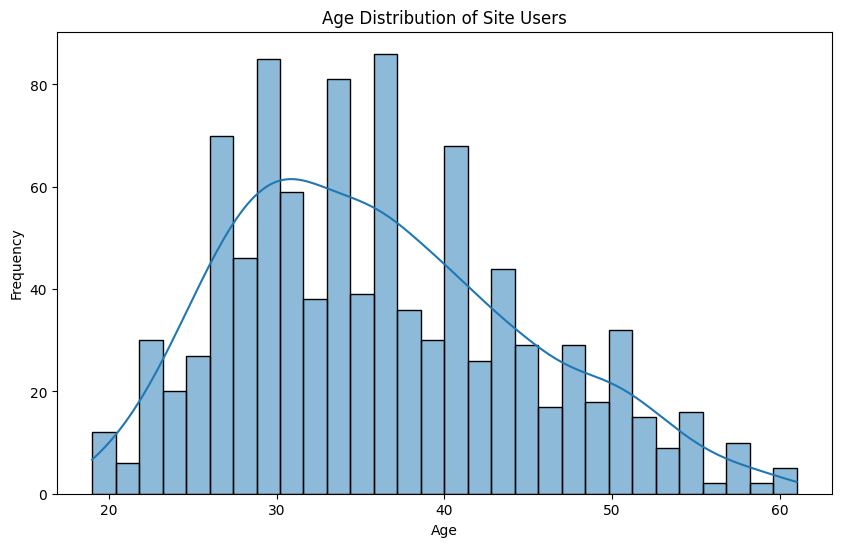

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Site Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### (b) Count of Clicked on Ad by Gender:

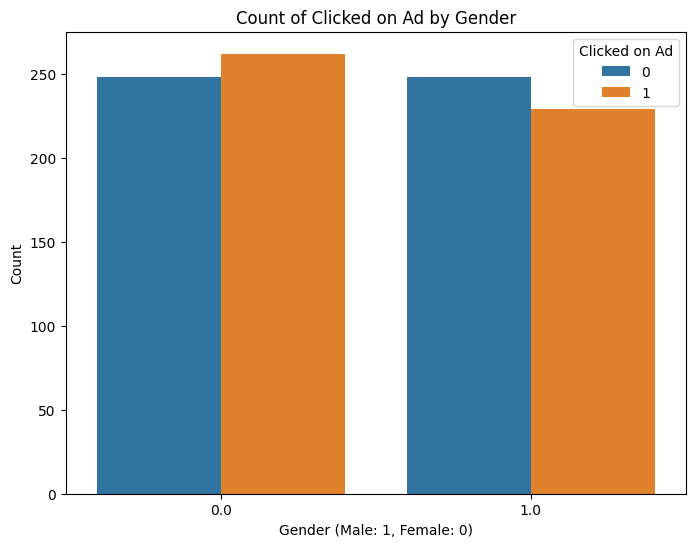

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Male', hue='Clicked on Ad', data=df)
plt.title('Count of Clicked on Ad by Gender')
plt.xlabel('Gender (Male: 1, Female: 0)')
plt.ylabel('Count')
plt.show()

#### (c) what is the income of people visiting this website?

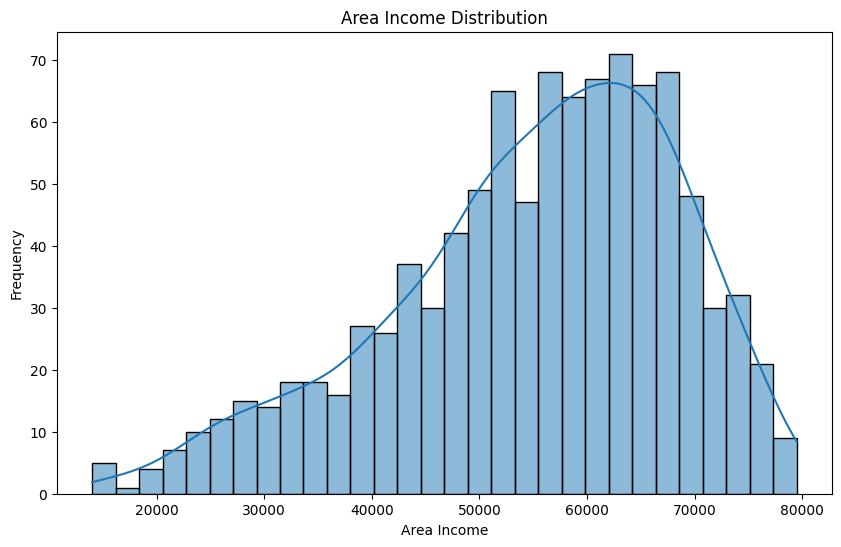

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Area Income'], bins=30, kde=True)
plt.title('Area Income Distribution')
plt.xlabel('Area Income')
plt.ylabel('Frequency')
plt.show()

#### (d) what is the amount of time spent on site out of the daily time spent on the internet

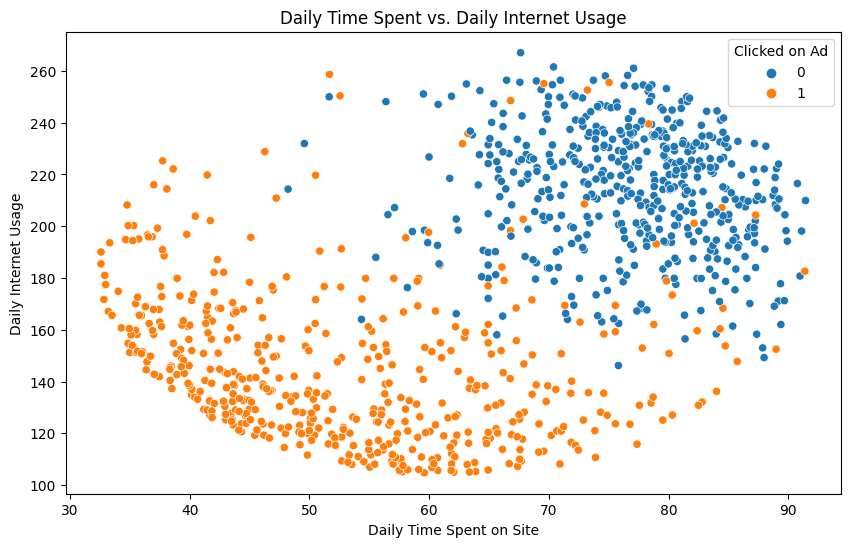

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df, hue='Clicked on Ad')
plt.title('Daily Time Spent vs. Daily Internet Usage')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.show()

#### Inferences
1. **User Engagement and Site Purpose:**
   - Users who spend a significant portion of their internet time on the site, ranging from 40-65%, indicate a high level of engagement. The wide range of session durations, from 32.6 to 91.43 minutes, suggests that users find the site entertaining and are likely to engage in prolonged sessions. This pattern aligns with the conclusion that the site serves primarily for entertainment purposes.

2. **Diverse User Socioeconomic Backgrounds:**
   - The income distribution, spanning from $20,000 to $80,000, reveals a broad socioeconomic spectrum among site users. This diversity implies that the website attracts visitors from different social classes. The inclusivity of users across varied income ranges contributes to the conclusion that the website appeals to a wide audience.

3. **Website Popularity:**
   - The wide demographic range, encompassing users in their late 20s to early 40s, suggests that the website caters to a diverse audience. This age group, often associated with educational and professional engagements, constitutes the most frequent users of the internet on the site. The average age of 36 years indicates a balance between younger and older adults. These factors collectively support the conclusion that the website is likely to be popular and resonates with a broad user base.

4. **Target Audience and Age Group:**
   - The age distribution, ranging from 19 to 61 years with an average age of 36, points towards an adult target audience. The site's content and features seem tailored to adults, aligning with the age-related educational and professional requirements of users in their late 20s to early 40s. The varied age range further reinforces the conclusion that the website caters to an adult demographic.

5. **Advertisement Engagement Across Genders:**
   - The count of users who clicked on the ad, analyzed by gender, reveals a fairly balanced engagement between male and female users. Both genders show a comparable number of clicks, suggesting that the advertising content on the site resonates well with both male and female audiences. This balanced engagement further supports the conclusion that the website's content is broadly appealing and inclusive across different genders.

## **4. model**  

#### (a) feature selection

In [85]:
len(df['Ad Topic Line'].unique())

987

In [86]:
len(df['City'].unique())

957

In [87]:
len(df['Country'].unique())

236

In [88]:
df['Country'].value_counts()[:20]

France            9
Czech Republic    9
Micronesia        8
Afghanistan       8
Turkey            8
Liberia           8
Australia         8
Cyprus            8
Peru              8
Greece            8
South Africa      8
Western Sahara    7
Luxembourg        7
Taiwan            7
Senegal           7
Cambodia          7
Eritrea           7
Albania           7
Ethiopia          7
Fiji              7
Name: Country, dtype: int64

   - The columns Ad Topic Line, City, and Country have numerous unique values, complicating the model's ability to establish meaningful relationships for predicting the target variable.

   - Despite the Country column having fewer unique values, it lacks a dominant country that significantly stands out, diminishing its predictive potential.

   - Consequently, I have opted to drop these columns from the dataset for improved model simplicity and predictive accuracy.

In [89]:
df = df.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

<ipython-input-90-006dcbb03593>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


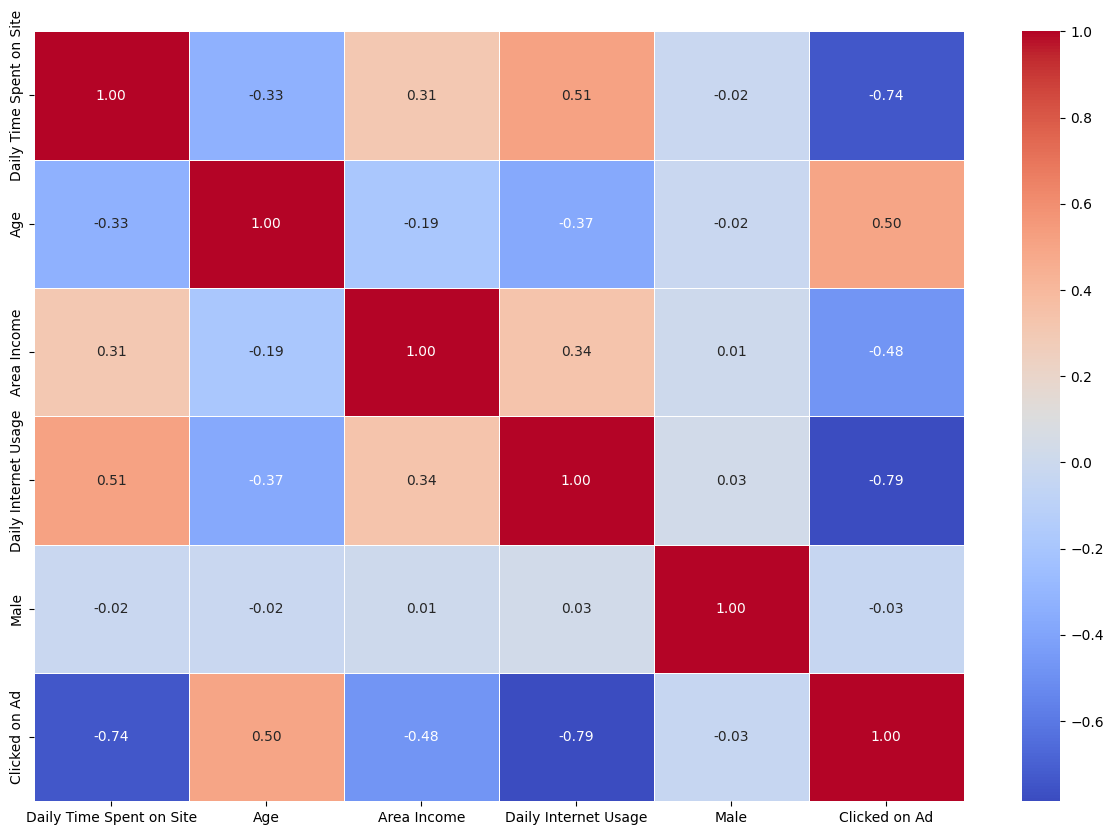

In [90]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="coolwarm");

* converting timestamp into the columns Month, Day of month, Day of week and Hour

In [91]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day of month'] = df['Timestamp'].dt.day
df['Day of week'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)

#### (b) fitting a regression model on the data

In [92]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 500)

X = df.drop('Clicked on Ad', axis = 1)
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test,y_test)

0.9040404040404041

## **5. evaluation**

#### (a) confusion matrix

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_preds, y_test)

array([[100,  14],
       [  5,  79]])

* the total number of accurate predictions `(TN + TP)` are 100 + 79 = 179 out of 198
* the total number of inaccurate predictions `(FP + FN)` are 5 + 14 = 19 out of 198

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(accuracy_score(y_preds,y_test))
print(precision_score(y_preds, y_test))
print(recall_score(y_preds, y_test))

0.9040404040404041
0.8494623655913979
0.9404761904761905
